In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Low Pass Filters
A low pass filter filters out voltage signals with higher frequencies by causing a higher amount of voltage to drop across the other components while allowing lower frequency voltage signals to "pass through" with less impedance.  

## Inductive Filters
One type of low pass filter is an inductor in series with the load.  Via the notion that the reactance of an inductor, denoted as '$X_L$', with an inductance of $L$ is proportional to the frequency of the voltage signal, the reactance, and therefore impedance, goes up as the frequency goes up, which means that the voltage dropped accross the inductor, or inductive filter, goes up with the frequency as well, since the voltage running accross the inductor, denoted as '$V_L$', is proportional to the impedance of the inductor, denoted as '$Z_L$'.  Ultimately, this leaves less voltage to drop across the load when the frequency is relatively high.
$$ X_L = 2\pi f L$$
$$ Z_L = X_L\angle90^{\circ}$$
$$ V_L = Z_LI$$

### Example

Suppose we have a circuit with a $3$H inductor ($L_1$) in series with the $1\text{k}\Omega$ load ($R_\text{load}:=R_L$) and a $1\text{V}\angle0$ AC power supply.  
![inductive filter](https://www.allaboutcircuits.com/uploads/articles/inductive-low-pass-filter-circuit.png)  
The reactance of $L_1$ is given by:
$$ X_L = 6\pi f \text{H}$$
$$ Z_L = X_L\angle90^{\circ}$$
The voltage running accross the inductor and the load is:
$$ V_L = Z_LI$$
$$ V_R = 1\text{k}\Omega \cdot I$$
Via KVL, we can find the current.
$$ 1\text{V}\angle0 = V_L + V_R = (Z_L+1000\Omega)I$$
$$ I = \frac{1\text{V}\angle0}{Z_L+1000\Omega}$$
The complex number representation of the denominator of the above fraction, denoted as '$\mathbf{D}$', in rectangular form is:
$$\mathbf{D}= Z_L+1000\Omega = 1000\Omega + j\cdot X_L$$
And, in polar form:
$$ |\mathbf{D}| = \sqrt{X_L^2+10^6\Omega^2} $$
$$ D_\theta = \arcsin \frac{X_L}{1000\Omega}$$
$$ \mathbf{D} = |\mathbf{D}|\angle D_\theta$$
The amplitude of the current is thus:
$$ |I|=\frac{1}{|\mathbf{D}|} = \frac{1}{\sqrt{36\pi^2f^2\text{H}^2 + 10^6\Omega^2}}$$
Via the above in conjunction with Ohm's Law, the amplitude of the voltage running accross the load is:
$$ |V_R|:=|V_R|(f) = \frac{1000\Omega}{\sqrt{36\pi^2f^2\text{H}^2 + 10^6\Omega^2}} $$

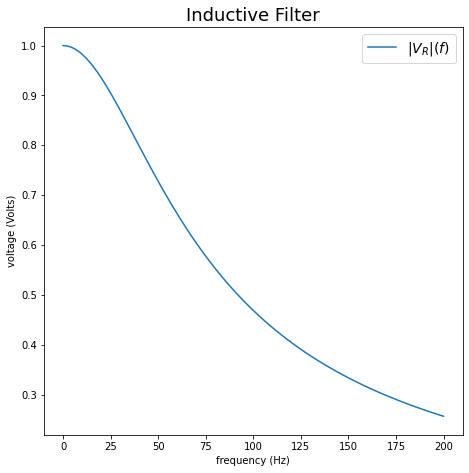

In [3]:
f = np.linspace(0, 200, num=200)
magV_R = 1000/np.sqrt(36*np.pi**2*f**2 + 10**6)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set_title('Inductive Filter', size=18)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('voltage (Volts)')
ax.plot(f, magV_R, label=r'$|V_R|(f)$')
ax.legend(fontsize=14)

### Generalized Equations

The above can be generalized by assuming an inductance of $L_1=L$, a load with a resistance of $R_L$, and an AC power supply of $E = |E|\angle0$. 
$$ X_L = 2\pi f L$$
$$ E = Z_LI + R_LI = I(Z_L+R_L)$$
$$ I = \frac{E}{Z_L+R_L}$$
The complex number represention of the denominator, denoted as '$\mathbf{D}$', in polar form is:
$$ \mathbf{D} = |\mathbf{D}|\angle D_\theta$$
$$ D_\theta = \arcsin \frac{X_L}{R_L}$$
$$ |\mathbf{D}| = \sqrt{X_L^2 + R_L^2}$$
The amplitude of the current is thus:
$$ |I| = \frac{|E|}{|\mathbf{D}|}$$
Via Ohm's Law, the voltage running accross the load is given by:
$$ V_{RL} = R_LI$$
And the amplitude of said voltage is given by:
$$ |V_{RL}|:=|V_{RL}|(f) = R_L|I| = R_L\frac{|E|}{\sqrt{4\pi^2f^2L^2 + R_L^2}}$$

## Capacitive Filters
A resistor in series with a parallel circuit consisting of a capacitor in parallel with a resistive load is another way of forming a low pass filter.  As the frequency goes up the reactance and therefore the voltage running accross the capacitor goes down;  And, since the voltage running accross the load is equal to that of the capacitor it is in parallel with, the voltage running accross the load goes down with the capacitor as the frequency goes up.  Conversely, the voltage running accross the capacitor and thus the load goes up as the frequency goes down.  This fits the concept of low pass filtration.  

Via KVL, the voltage dropped across the resistor that is in series with the parallel circuit goes up as the frequency goes up and vice versa.

### Example

Suppose there is a circuit defined by '$E--R_1--C_1//R_L$', where
* $E=1\text{V}\angle0$
* $R_1 = 500\Omega$
* $C_1= 7\mu\text{F}=7\cdot10^{-6}\text{F}$
* $R_L:=R_\text{load}=1000\Omega$
![capacitive filter](https://www.allaboutcircuits.com/uploads/articles/capacitive-low-pass-filter-circuit.png)
The impedance of $R_1$ is of course:
$$ Z_1 = X_1\angle0 = R_1\angle0$$
The impedance of $C_1//R_L$, denoted as '$Z_2$', is given by:
$$Z_2 = \frac{1}{D}$$
where
$$ D = \frac{1}{Z_{C1}} + \frac{1}{Z_{RL}}$$
$$ Z_{RL} = R_L\angle0 = R_L$$
$$ Z_{C1} = X_{C1}\angle-90^{\circ} = - j \cdot X_{C1}$$
$$ X_{C1} = \frac{1}{14\pi f \mu\text{F}}$$
$$ D = \frac{1}{X_{C1}}\angle90^{\circ} + \frac{1}{R_L}\angle0 = \frac{1}{R_L} + j \cdot \frac{1}{X_{C1}}$$
The denominator, denoted as '$D$', in polar form is given by:
$$ D = |D|\angle D_\theta$$
$$ D_\theta = \arcsin \frac{1}{X_{C1}|D|} = \arccos \frac{1}{R_L|D|}$$
$$ |D| = \sqrt{\frac{1}{R_L^2} + \frac{1}{X_{C1}^2}}$$
Via KVL,
$$ E = Z_1I + Z_2I = (Z_1+Z_2)I$$
$$ I = \frac{E}{Z_1+Z_2}$$
Let $Z_T$ be defined as:
$$ Z_T:=Z_1+Z_2 = R_1\angle0 + \frac{1}{|D|}\angle-D_\theta$$
The rectangular form of $Z_2$ is given by:
$$ Z_2=\frac{1}{|D|}(\cos -D_\theta + j \cdot \sin-D_\theta) = \frac{1}{|D|}(\cos D\theta - j \cdot \sin D_\theta)$$
$$ Z_2 = \frac{1}{|D|}\left(\frac{1}{R_L|D|}  - j \cdot \frac{1}{X_{C1}|D|} \right)$$
Thus $Z_T$ is given by:
$$ Z_T = R_1 + \frac{1}{R_L|D|^2} - j \cdot \frac{1}{X_{C1}|D|^2}$$

$$Z_T = \frac{R_1R_L|D|^2 + 1}{R_L|D|^2} - j \cdot \frac{1}{X_{C1}|D|} $$